In [9]:
import pandas as pd
import torch

from sko.SA import SA
import plotly.express as px

In [10]:
demo_func = lambda x: x[0] ** 2 + (x[1] - 0.05) ** 2 + x[2] ** 2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [17]:
sa = SA(func=demo_func, x0=[1, 1, 1], T_max=1, T_min=1e-9, L=300, max_stay_counter=150)
best_x, best_y = sa.run()
print('best_x:', best_x, 'best_y', best_y)
px.line(data_frame=pd.DataFrame(sa.best_y_history).cummin(axis=0), line_shape="vh")

best_x: [-6.65292845e-06  5.00120341e-02 -3.29882950e-06] best_y 1.9996240262644622e-10


best_x: [-2.98023233e-08  2.08616263e-07] 
 best_y: [0.]


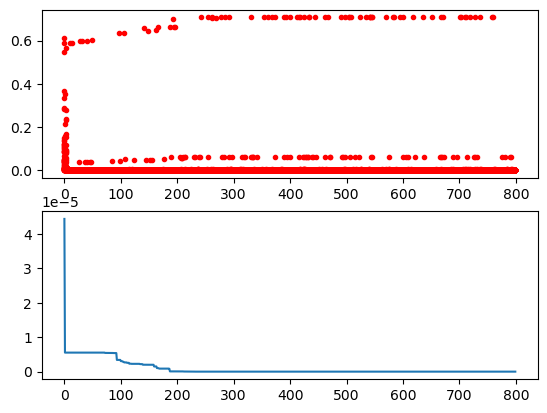

In [20]:
import numpy as np


def schaffer(p):
    '''
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    https://en.wikipedia.org/wiki/Test_functions_for_optimization
    '''
    x1, x2 = p
    part1 = np.square(x1) - np.square(x2)
    part2 = np.square(x1) + np.square(x2)
    return 0.5 + (np.square(np.sin(part1)) - 0.5) / np.square(1 + 0.001 * part2)


# %%
from sko.GA import GA

ga = GA(func=schaffer, n_dim=2, size_pop=50, max_iter=800, prob_mut=0.001, lb=[-1, -1], ub=[1, 1], precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)
# %% Plot the result
import pandas as pd
import matplotlib.pyplot as plt

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

best_x is  [0.   0.05 0.5 ] best_y is [0.25]


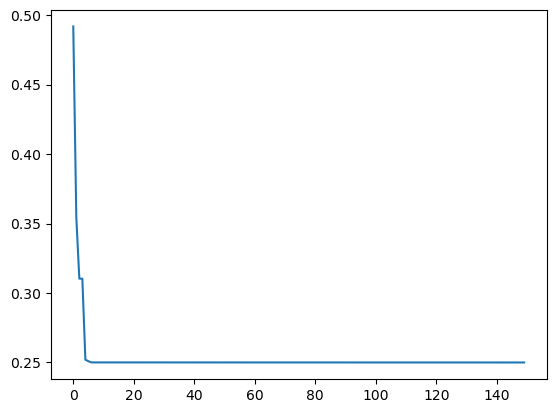

In [21]:
def demo_func(x):
    x1, x2, x3 = x
    return x1 ** 2 + (x2 - 0.05) ** 2 + x3 ** 2


# %% Do PSO
from sko.PSO import PSO

pso = PSO(func=demo_func, n_dim=3, pop=40, max_iter=150, lb=[0, -1, 0.5], ub=[1, 1, 1], w=0.8, c1=0.5, c2=0.5)
pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)

# %% Plot the result
import matplotlib.pyplot as plt

plt.plot(pso.gbest_y_hist)
plt.show()

In [22]:
def obj_func(p):
    x1, x2, x3 = p
    return x1 ** 2 + x2 ** 2 + x3 ** 2


constraint_eq = [
    lambda x: 1 - x[1] - x[2]
]

constraint_ueq = [
    lambda x: 1 - x[0] * x[1],
    lambda x: x[0] * x[1] - 5
]

# %% Do DifferentialEvolution
from sko.DE import DE

de = DE(func=obj_func, n_dim=3, size_pop=50, max_iter=800, lb=[0, 0, 0], ub=[5, 5, 5],
        constraint_eq=constraint_eq, constraint_ueq=constraint_ueq)

best_x, best_y = de.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [1.00876875 0.99135793 0.00864207] 
 best_y: [2.00047964]


In [23]:
def func(x):
    x1, x2 = x
    return 1 / x1 ** 2 + x1 ** 2 + 1 / x2 ** 2 + x2 ** 2


from sko.AFSA import AFSA

afsa = AFSA(func, n_dim=2, size_pop=50, max_iter=300,
            max_try_num=100, step=0.5, visual=0.3,
            q=0.98, delta=0.5)
best_x, best_y = afsa.run()
print(best_x, best_y)

[1.00001528 1.00002011] 4.000000002552106


In [ ]:
from sko.IA import IA_TSP
import sys
from scipy import spatial

file_name = sys.argv[1] if len(sys.argv) > 1 else 'data/nctu.csv'
points_coordinate = np.loadtxt(file_name, delimiter=',')
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')
distance_matrix = distance_matrix * 111000  # 1 degree of lat/lon ~ = 111000m


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


num_points = points_coordinate.shape[0]
ia_tsp = IA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=500, max_iter=800, prob_mut=0.2,
                T=0.7, alpha=0.95)
best_points, best_distance = ia_tsp.run()
print('best routine:', best_points, 'best_distance:', best_distance)